# Final Project Big Data Analytics

# Analisis Kualitas Kandungan dalam Red Wine 

Disusun oleh Guntur Arief Darmawan

# Dataset

Dataset ini merupakan data red winequality. Dalam dataset ini terkait dengan varian dari anggur merah yang didalam data terdapat kandungan-kandungan dari anggur merah yang mepengaruhi kualitas dari anggur merah tersebut.

Data diperoleh dari Uci Machine Learning pada link: https://archive.ics.uci.edu/ml/datasets/wine+quality

Dalam dataset ini terdapat variabel seperti berikut:

1.  fixed acidity/keasaman tetap

2.  volatile acidity/keasaman yang mudah menguap

3.  citric acid/asam sitrat

4.  residual sugar/sisa gula

5.  chlorides/klorida

6.  free sulfur dioxide/sulfur dioksida bebas

7.  total sulfur dioxide/sulfur dioksida total

8.  density/kepadatan

9.  pH

10. sulphates/sulfat

11. alcohol/alkohol

12. quality/kualitas


In [21]:
import s3fs
import pandas as pd

s3 = s3fs.S3FileSystem()

with s3.open('budiman/winequality-red.csv', 'rb') as f:
    data = pd.read_csv(f)

data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


In [22]:
# menghapus baris yang mengandung null
data1 = data.dropna(axis=0, how='any')
# cek data null
data1[data1['citric acid'].isnull()]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


# Scatter Plot

Kemudian selanjutnya menampilkan Scatter Plot untuk masing-masing atribut

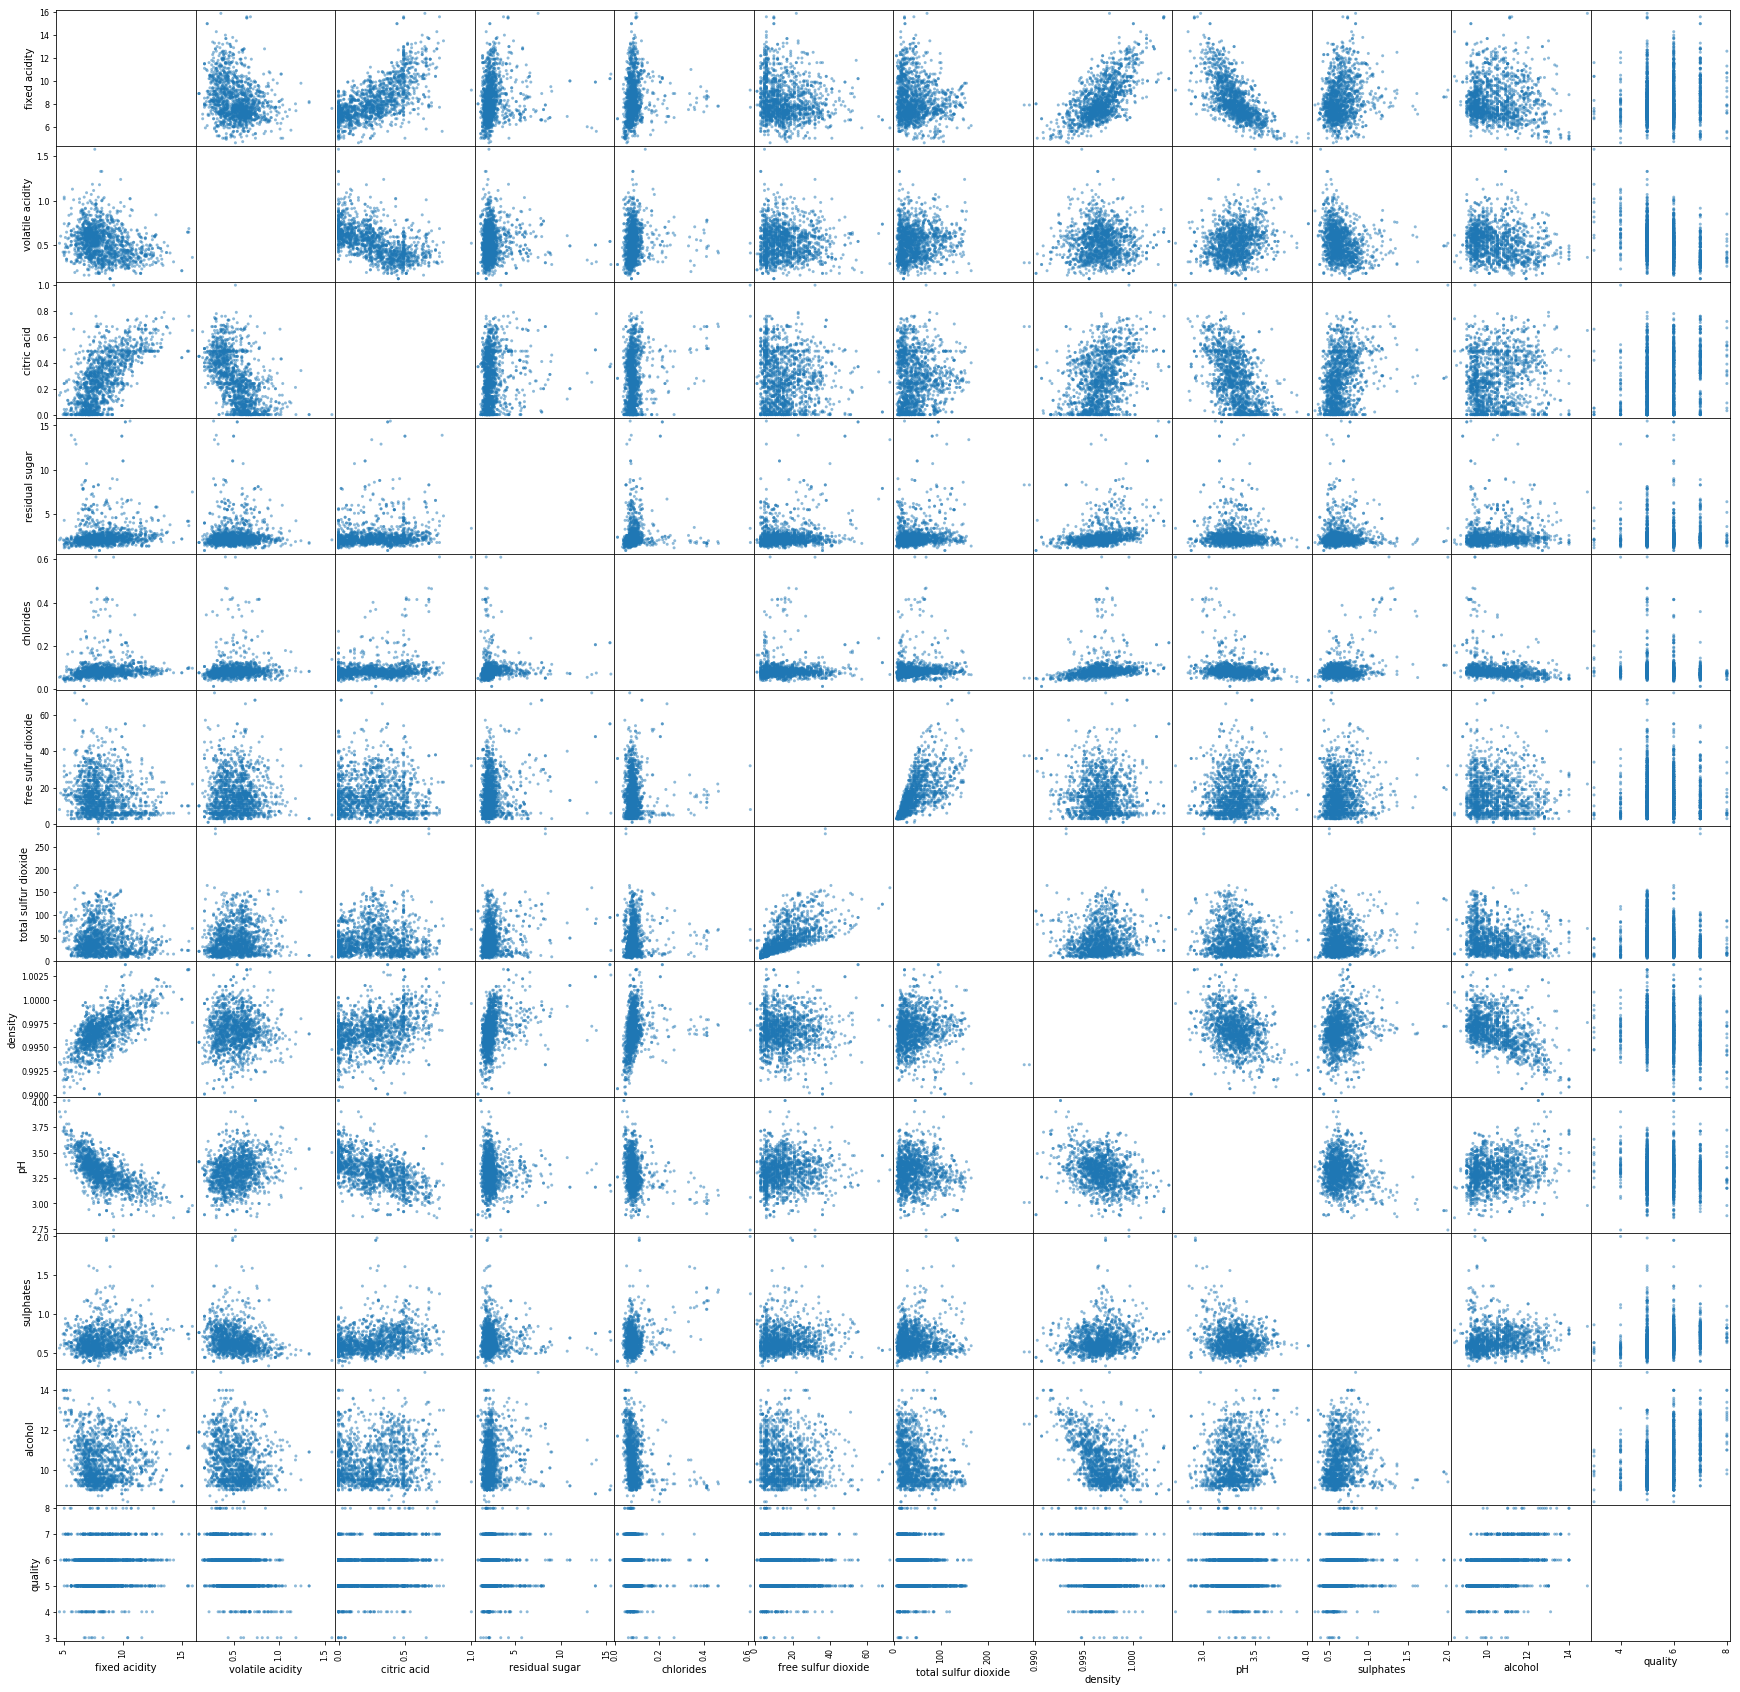

In [26]:
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
axes = scatter_matrix(data,figsize=(30, 30), diagonal = None)
plt.show()

Dari scatter plot diatas akan dipilih 2 atribut yang memiliki dugaan kuat adanya korelasi, dan untuk mencari atribut yang memiliki dugaan kuat adanya korelasi maka digunakan heatmap plot untuk menghitung koefisien korelasi

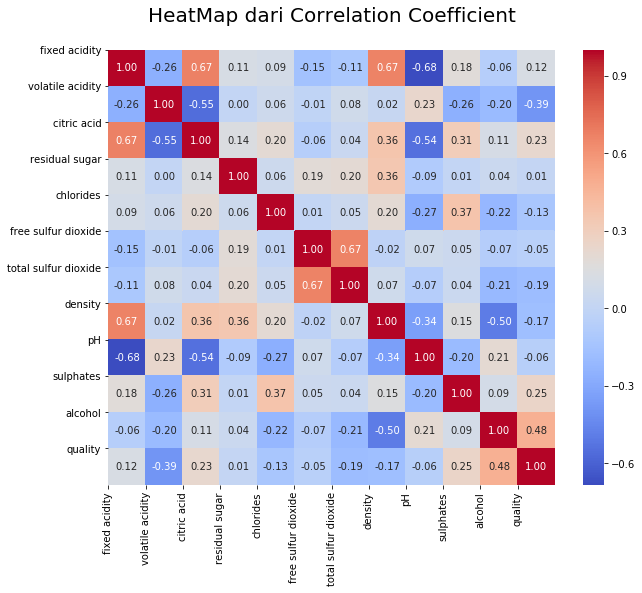

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr()
fig, ax = plt.subplots(figsize=(10, 8)) # Ukuran grafik

# Membuat Heat Map, yang bisa diberi anotasi dan nilai
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")

plt.xticks(range(len(corr.columns)), corr.columns) # Memberi label X
plt.yticks(range(len(corr.columns)), corr.columns) # Memberi label Y
plt.title("HeatMap dari Correlation Coefficient\n", fontsize= 20)

plt.show()

Dari plot heatmap di atas maka dipilih 2 atribut yang diduga memilki korelasi yang kuat yaitu citric acid dan fixed acidity karena memiliki koefisien korelasi yang besar dan mendekati 1. Untuk scatter plot hubungan antara citric acid dan fixed acidity lebih jelasnya dapat dilihat sebagai berikut

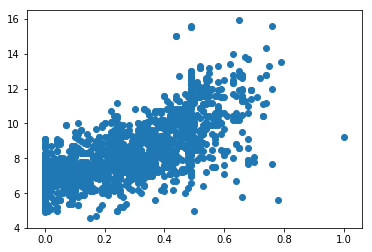

In [12]:
import matplotlib.pyplot as plt
plt.scatter(data['citric acid'], data['fixed acidity'])
plt.show()

# Statistik Deskriptif

Selanjutnya dilakukan statistik deskriptif 

In [62]:
data['citric acid'].describe()

count    1599.000000
mean        0.270976
std         0.194801
min         0.000000
25%         0.090000
50%         0.260000
75%         0.420000
max         1.000000
Name: citric acid, dtype: float64

In [14]:
data['fixed acidity'].describe()

count    1599.000000
mean        8.319637
std         1.741096
min         4.600000
25%         7.100000
50%         7.900000
75%         9.200000
max        15.900000
Name: fixed acidity, dtype: float64

Statistik dekriptif diatas untuk mengetahui jumlah data, nilai rata-rata, standar deviasi, nilai minimal, nilai quantil, median, dan nilai maximal

Selanjutnya dilakukan analisis model regresi dengan menggunakan regresi linear seperti berikut

# Regresi Linear

In [11]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math


x = data["citric acid"]
y = data["fixed acidity"]

np.random.seed(0)

# Menormalisasi data
xdata =x/max(x)
ydata =y/max(y)



# Membagi data sebagai data train dan data test dengan perbandingan 8:2
msk = np.random.rand(len(x)) < 0.8

train_x = np.array(xdata[msk]).reshape(-1,1)
test_x = np.array(xdata[~msk]).reshape(-1,1)
train_y = np.array(ydata[msk]).reshape(-1,1)
test_y = np.array(ydata[~msk]).reshape(-1,1)

model = LinearRegression()
model.fit(train_x,train_y)

intercept = model.intercept_ # Menghitung Intersepsi (b0)
slope = model.coef_[0] # Menghitung Slop (b1)
r_sq = model.score(train_x,train_y) # Menghitung hubungan variabel x dan y

pred_y = model.predict(test_x)

print('Intercept: {:0.2f}'.format(intercept[0]))
print('Slope: {:0.2f}'.format(slope[0]))
print('R\u00b2: {:0.2f}'.format(r_sq))

mae = mean_absolute_error(test_y, pred_y)  
mse = mean_squared_error(test_y, pred_y)
rmse = math.sqrt(mse)

print('MAE:', mae)
print('MSE:', mse)

result = pd.DataFrame() # Membuat dataframe untuk menampung hasil
result["Linear"] = [mae,mse,rmse,r_sq]

Intercept: 0.42
Slope: 0.39
R²: 0.46
MAE: 0.06370252544322999
MSE: 0.006705175124892592


Dari analisis regresi linear di atas diperoleh nilai r2, mae, dan mse yang mana nilai ini akan dibandingkan dengan nilai pada analisis regresi non linear untuk menentukan model regresi mana yang tepat digunakan.

Selanjutnya dilakukan analisis dengan regresi non linear seperti berikut

# Regresi Non Linear

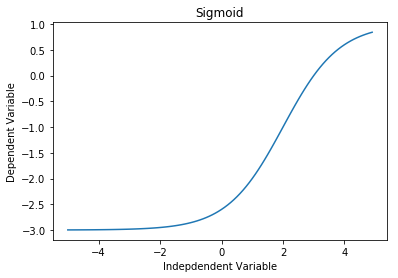

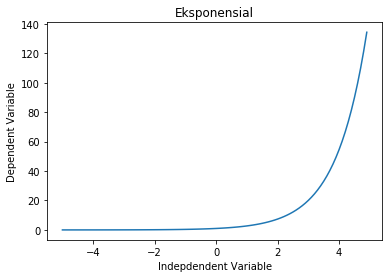

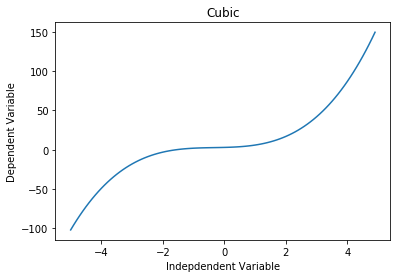

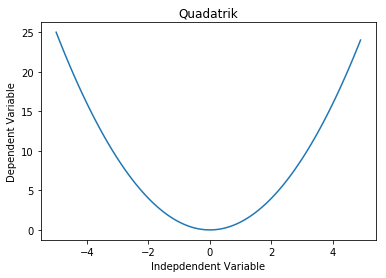

In [36]:
# Membuat input x

X = np.arange(-5.0, 5.0, 0.1)
# Membuat output yi dari input x, dengan nilai beta sembarang

y1 = 1-4/(1+np.power(3, X-2))
plt.plot(X,y1) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.title('Sigmoid')
plt.show()

y2 = np.exp(X)
plt.plot(X,y2) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.title('Eksponensial')
plt.show()

y3 = 1*(X**3) + 1*(X**2) + 1*X + 3
plt.plot(X,y3) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.title('Cubic')
plt.show()

y4 = np.power(X,2)
plt.plot(X,y4) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.title('Quadatrik')
plt.show()


In [29]:
from scipy.optimize import curve_fit
import numpy as np

def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x.flatten(), train_y.flatten())

# predict using test set
y_hat = sigmoid(test_x, *popt)
# Membangun model dengan data train
  
# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.06
Residual sum of squares (MSE): 0.01
R2-score: -0.13


In [31]:
from scipy.optimize import curve_fit
import numpy as np

# Fungsi Eksponensial
def exponensial(x,Beta_0, Beta_1):
    y = Beta_0*np.exp(Beta_1*x)
    return y

# build the model using train set
popt, pcov = curve_fit(exponensial, train_x.flatten(), train_y.flatten())

# predict using test set
y_hat = exponensial(test_x, *popt)
# Membangun model dengan data train
  
# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.06
Residual sum of squares (MSE): 0.01
R2-score: -0.05


In [32]:
from scipy.optimize import curve_fit
import numpy as np

# Fungsi Cubic
def cubic(x,Beta_0,Beta_1,Beta_2,Beta_3):
    y = Beta_0+Beta_1*x+Beta_2*x**2+Beta_3*x**3
    return y

# build the model using train set
popt, pcov = curve_fit(cubic, train_x.flatten(), train_y.flatten())

# predict using test set
y_hat = cubic(test_x, *popt)
# Membangun model dengan data train
  
# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.06
Residual sum of squares (MSE): 0.01
R2-score: -0.07


In [33]:
from scipy.optimize import curve_fit
import numpy as np

# Fungsi Quadratic
def quadratic(x,Beta_0, Beta_1):
    y = Beta_0*np.exp(Beta_1*x)
    return y

# build the model using train set
popt, pcov = curve_fit(quadratic, train_x.flatten(), train_y.flatten())

# predict using test set
y_hat = quadratic(test_x, *popt)
# Membangun model dengan data train
  
# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.06
Residual sum of squares (MSE): 0.01
R2-score: -0.05


Dari nilai, r2, mse, dan mae diketahui model regresi linear yang paling tepat digunakan.

Berikut menampilkan diagram korelasi antara citric acid dan fixed acidity dengan regresi linear

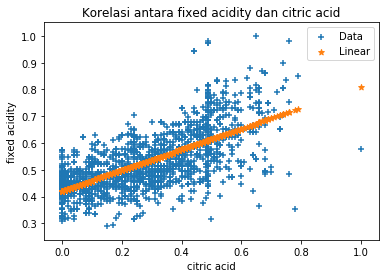

In [43]:
def linear(x, Beta_0, Beta_1):
    y = Beta_0 + Beta_1*x
    return y

popt1, pcov1 = curve_fit(linear, train_x.flatten(), train_y.flatten())
y = linear(xdata, *popt1)
plt.scatter(xdata, ydata,marker = '+',label = "Data")
plt.scatter(xdata,y, marker = '*',label = "Linear")

plt.legend(loc='best')
plt.ylabel('fixed acidity')
plt.xlabel('citric acid')
plt.title("Korelasi antara fixed acidity dan citric acid")
plt.show()

Terhadap dataset yang diperoleh, kemuadian dilakukan analisis menggunakan clustering

# Clustering

Anaslis clustering yang digunakan disini adalah KMeans Clustering

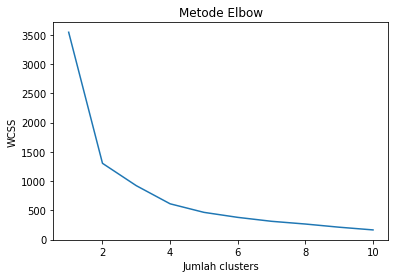

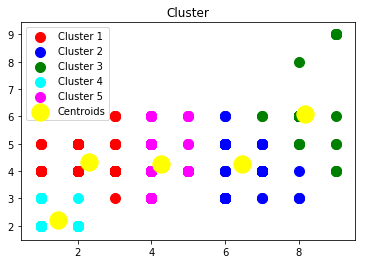

In [82]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
# Mengimpor dataset
dataset = pd.read_csv('G://forestfires.csv')
X = dataset.iloc[:, [0,1]].values
 
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Metode Elbow')
plt.xlabel('Jumlah clusters')
plt.ylabel('WCSS')
plt.show()
 
# Menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
 
# Visualisasi hasil clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Cluster')
plt.legend()
plt.show()

Hasil clustering dapat dilihat pada gambar di atas